In [1]:
# !pip install networkx
# !pip install matplotlib
# !pip install tqdm
# !pip install pandas
# !pip install numpy
# !pip install graphviz
# !pip install scikit-learn

In [37]:
import random
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations, groupby

from networkx.algorithms import tree
from networkx.algorithms import bellman_ford_predecessor_and_distance
from networkx.algorithms import floyd_warshall_predecessor_and_distance

import numpy.typing as npt

# Task 1. Algorithm's analysis

## Generating graph

In [ ]:

# You can use this function to generate a random graph with 'num_of_nodes' nodes
# and 'completeness' probability of an edge between any two nodes
# If 'directed' is True, the graph will be directed
# If 'draw' is True, the graph will be drawn
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """

    
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))
    
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
                
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)
                
    if draw: 
        plt.figure(figsize=(10,6))
        if directed:
            pos = nx.arf_layout(G)#draws with edge weights
            nx.draw(G,pos, node_color='lightblue', 
                    with_labels=True,
                    node_size=500, 
                    arrowsize=20, 
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)
            
        else:
            nx.draw(G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)
        
    return G

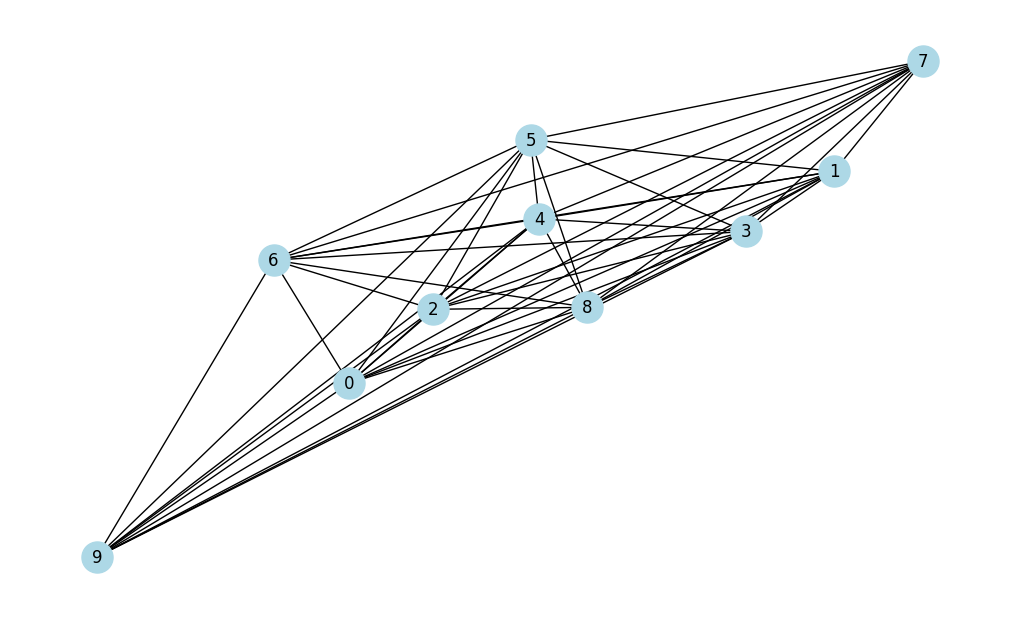

In [60]:
G = gnp_random_connected_graph(10, 1, False, True)

## Subtask 1.1

### Prim's algorithm

In [61]:
mstp = tree.minimum_spanning_tree(G, algorithm="prim")

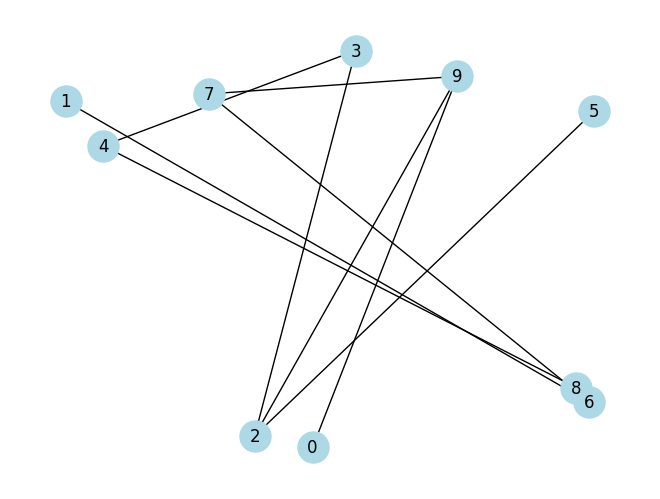

In [42]:
nx.draw(mstp, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

In [62]:
mstp.edges(), len(mstp.edges())

(EdgeView([(0, 7), (1, 9), (2, 5), (3, 9), (3, 8), (4, 6), (5, 9), (6, 9), (7, 9)]),
 9)

In [ ]:
def prims_algorithm(G, start):
    prim_tree = []# our tree
    total_weight = 0
    edges = {our_node: (float('inf'), None) for our_node in G.nodes()}#storage for our weights for nodes are
    edges[start] = (0, None)
    visited = [start]
    new_node = start


    while len(visited) < len(G.nodes()):#visits all nodes
        for node in G.neighbors(new_node):
            if node not in visited:
                if G[new_node][node]['weight'] < edges[node][0]:#updates the shortest edge if found 
                    edges[node] = (G[new_node][node]['weight'], new_node)

        our_edge_weight = float('inf')#founds the shortest edge that contains our node
        node_to_append = None
        for edge in edges:
            if edge not in visited:
                if edges[edge][0] < our_edge_weight:
                    our_edge_weight = edges[edge][0]
                    node_to_append = edge

        total_weight += our_edge_weight#updates everything if when found 
        visited.append(node_to_append)
        prim_tree.append((new_node, node_to_append, our_edge_weight))
        new_node = node_to_append

    return prim_tree, total_weight#returns the tree

([(0, 7, -4), (7, 9, -5), (9, 1, -4), (1, 5, -3), (5, 6, 0), (6, 4, -1), (4, 3, 1), (3, 8, -1), (8, 2, 7)], -10)


In [45]:
import time
from tqdm import tqdm

In [46]:
NUM_OF_ITERATIONS = 1000
my_times = []
total_time = 0
my_vertices_number = [10, 20, 50, 100, 200]
for number in my_vertices_number:
    time_taken = 0
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        
        G = gnp_random_connected_graph(number, 0.5, False)
        
        start = time.time()
        prim_tree, weight = prims_algorithm(G, start=0)
        end = time.time()
        total_time += end - start

        time_taken += end - start

    avg_time = time_taken/NUM_OF_ITERATIONS
    my_times.append(avg_time)

total_time / NUM_OF_ITERATIONS

100%|██████████| 1000/1000 [00:29<00:00, 34.19it/s]


0.02157204031944275

In [47]:
NUM_OF_ITERATIONS = 1000
times = []
total_time = 0
vertices_number = [10, 20, 50, 100, 200]
for number in vertices_number:
    time_taken = 0
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        
        G = gnp_random_connected_graph(number, 0.5, False)
        
        start = time.time()
        tree.minimum_spanning_tree(G, algorithm="prim")
        end = time.time()
        total_time += end - start

        time_taken += end - start

    avg_time = time_taken/NUM_OF_ITERATIONS
    times.append(avg_time)

total_time / NUM_OF_ITERATIONS

100%|██████████| 1000/1000 [00:20<00:00, 48.06it/s]


0.011236505746841432

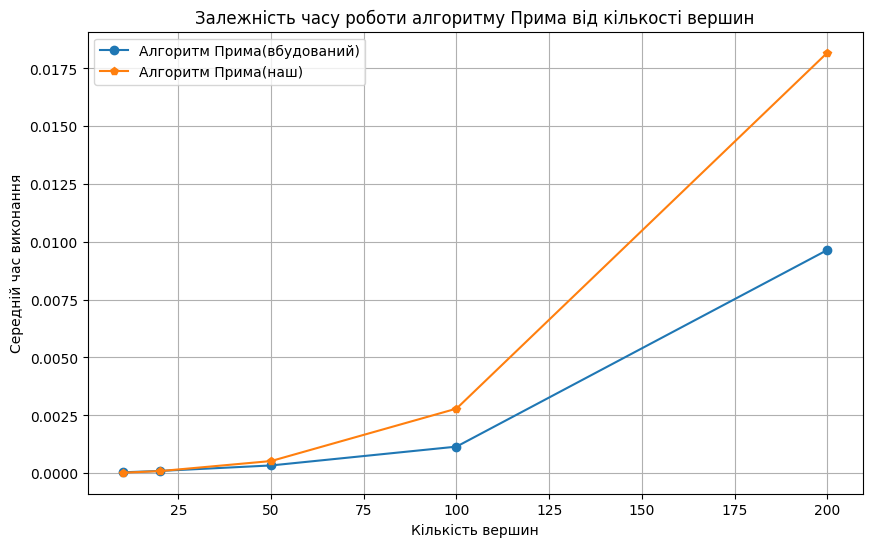

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(vertices_number, times, marker='o', linestyle='-', label="Алгоритм Прима(вбудований)")
plt.plot(vertices_number, my_times, marker='p', linestyle='-', label="Алгоритм Прима(наш)")
plt.xlabel("Кількість вершин")
plt.ylabel("Середній час виконання")
plt.title("Залежність часу роботи алгоритму Прима від кількості вершин")
plt.legend()
plt.grid(True)
plt.show()

## Subtask 1.2

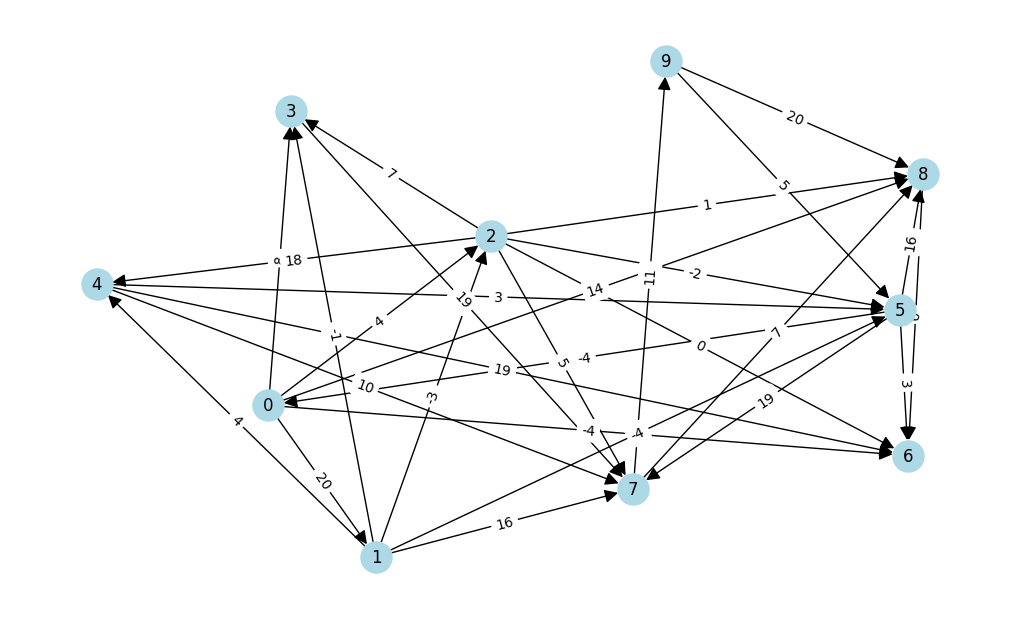

In [49]:
G = gnp_random_connected_graph(10, 0.5, True, True)

### Floyd-Warshall algorithm

In [50]:
# pred is a dictionary of predecessors, dist is a dictionary of distances dictionaries

try:
    pred, dist = floyd_warshall_predecessor_and_distance(G)
    for k, v in dist.items():
        print(f"Distances with {k} source:", dict(v))
except:
    print("Negative cycle detected")

Distances with 0 source: {0: -2, 1: 18, 2: 2, 3: 6, 6: -8, 8: 1, 4: 20, 5: 0, 7: 5, 9: 16}
Distances with 1 source: {1: 0, 2: -5, 3: -1, 4: 4, 5: -7, 7: -2, 0: -9, 6: -15, 8: -6, 9: 9}
Distances with 2 source: {2: -2, 8: -3, 3: 2, 4: 16, 5: -4, 6: -12, 7: 1, 0: -6, 1: 14, 9: 12}
Distances with 3 source: {3: 0, 7: 19, 0: 29, 1: 49, 2: 33, 4: 51, 5: 31, 6: 19, 8: 26, 9: 30}
Distances with 4 source: {4: 0, 5: 1, 6: -7, 7: 6, 0: -1, 1: 19, 2: 3, 3: 7, 8: 2, 9: 17}
Distances with 5 source: {5: -4, 0: -6, 6: -12, 7: 1, 8: -3, 1: 14, 2: -2, 3: 2, 4: 16, 9: 12}
Distances with 6 source: {6: 0, 0: inf, 1: inf, 2: inf, 3: inf, 4: inf, 5: inf, 7: inf, 8: inf, 9: inf}
Distances with 7 source: {7: 0, 9: 11, 8: 7, 0: 10, 1: 30, 2: 14, 3: 18, 4: 32, 5: 12, 6: 0}
Distances with 8 source: {8: 0, 6: 6, 0: inf, 1: inf, 2: inf, 3: inf, 4: inf, 5: inf, 7: inf, 9: inf}
Distances with 9 source: {9: 0, 5: 1, 8: -2, 0: -1, 1: 19, 2: 3, 3: 7, 4: 21, 6: -11, 7: 2}


In [ ]:
def floyd(inp):
    """
    Floyd warshalls algorthm
    """
    twins = []
    lenth = list(inp.nodes())[-1]
    lst = list(inp.edges(data=True))
    for i in range(lenth + 1):#twins is a memory storage to which we will add all the lenth 
        twins.append([])
        for g in range(lenth + 1):
            if g == i:
                twins[i].append([g, 0])# all i,i cells are 0 
            else:
                twins[i].append([g])
    for i in lst:
        twins[i[0]][i[1]].append(i[2]["weight"])# append all edges 
    for k in range(lenth + 1):#what floyd worshals algorithm does
        for i in range(lenth + 1):
            for j in range(lenth + 1):
                try:
                    if twins[i][j][1] > twins[i][k][1] + twins[k][j][1]:
                        twins[i][j][1] = twins[i][k][1] + twins[k][j][1]
                except IndexError:
                    try:
                        if twins[i][j][1]:
                            continue
                    except IndexError:
                        try:
                            twins[i][j].append(twins[i][k][1] + twins[k][j][1])
                        except IndexError:
                            continue
    return twins

try:
    dist = floyd(G)
    for k, v in enumerate(dist):
        for x in v:
            try:
                print(f"Distance with {k} source to {x[0]}: {x[1]}")
            except:
                print(f"Distance with {k} source to {x[0]}: inf")
except:
    print("Negative cycle detected")

Distance with 0 source to 0: -2
Distance with 0 source to 1: 18
Distance with 0 source to 2: 2
Distance with 0 source to 3: 6
Distance with 0 source to 4: 20
Distance with 0 source to 5: 0
Distance with 0 source to 6: -8
Distance with 0 source to 7: 5
Distance with 0 source to 8: 1
Distance with 0 source to 9: 16
Distance with 1 source to 0: -9
Distance with 1 source to 1: 0
Distance with 1 source to 2: -5
Distance with 1 source to 3: -1
Distance with 1 source to 4: 4
Distance with 1 source to 5: -7
Distance with 1 source to 6: -15
Distance with 1 source to 7: -2
Distance with 1 source to 8: -6
Distance with 1 source to 9: 9
Distance with 2 source to 0: -6
Distance with 2 source to 1: 14
Distance with 2 source to 2: -2
Distance with 2 source to 3: 2
Distance with 2 source to 4: 16
Distance with 2 source to 5: -4
Distance with 2 source to 6: -12
Distance with 2 source to 7: 1
Distance with 2 source to 8: -3
Distance with 2 source to 9: 12
Distance with 3 source to 0: 29
Distance with 3 

In [66]:
import time
from tqdm import tqdm

NUM_OF_ITERATIONS = 100
time_taken = 0
for i in tqdm(range(NUM_OF_ITERATIONS)):

    # note that we should not measure time of graph creation
    G = gnp_random_connected_graph(100, 0.4, False)

    start = time.time()
    floyd_warshall_predecessor_and_distance(G)
    end = time.time()

    time_taken += end - start

time_taken / NUM_OF_ITERATIONS

NUM_OF_ITERATIONS = 100
time_taken = 0
for i in tqdm(range(NUM_OF_ITERATIONS)):

    # note that we should not measure time of graph creation
    G = gnp_random_connected_graph(100, 0.4, False)

    start = time.time()
    floyd(G)
    end = time.time()

    time_taken += end - start

time_taken / NUM_OF_ITERATIONS

100%|██████████| 100/100 [00:28<00:00,  3.48it/s]


0.2818081164360046

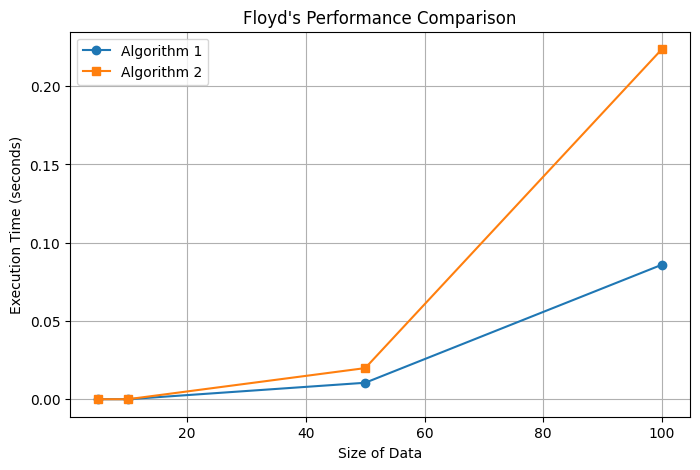

In [53]:
data_sizes = np.array([5, 10, 50, 100])
times_algo1 = []
times_algo2 = []
for size in data_sizes:
    G = gnp_random_connected_graph(size, 0.4, True)
    start = time.time()
    floyd_warshall_predecessor_and_distance(G)
    times_algo1.append(time.time() - start)

    start = time.time()
    floyd(G)
    times_algo2.append(time.time() - start)

plt.figure(figsize=(8, 5))
plt.plot(data_sizes, times_algo1, marker="o", linestyle="-", label="Algorithm 1")
plt.plot(data_sizes, times_algo2, marker="s", linestyle="-", label="Algorithm 2")

plt.xlabel("Size of Data")
plt.ylabel("Execution Time (seconds)")
plt.title("Floyd's Performance Comparison")
plt.legend()
plt.grid(True)
plt.show()

## Task 2. Decision Tree Classifier 

In [2]:
# scikit-learn package
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

In [54]:
class Node:

    def __init__(self, X: npt.NDArray, y: npt.NDArray, label=None):
        """
        :param X: numpy array of form [[feature1,feature2, ... featureN], ...] (i.e. [[1.5, 5.4, 3.2, 9.8] , ...] for case with iris d.s.)
        :param y: numpy array of from [class1, class2, ...] (i.e. [0,1,1,2,1,0,...] for case with iris d.s.)
        """
        self.X = X
        self.y = y
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None
        self.label = label

In [ ]:
class DecisionTreeClassifier:
    def __init__(self, max_depth: int) -> None:
        self.max_depth = max_depth
        self.tree = None
        self.number_of_classes = None

    def build_tree(self, X, y, depth):
        """
        Every man needs to plant a son, raise a house and build a tree
        """
        if depth < self.max_depth and len(np.unique(y)) > 1:
            best_feature, best_threshold = self.best_split(X, y)#finds the best feature and threshold for splitting
            if best_feature is not None:
                left_mask = X[:, best_feature] <= best_threshold#splits the data into left and right child nodes
                right_mask = X[:, best_feature] > best_threshold
                left_tree = self.build_tree(
                    X[left_mask].copy(), y[left_mask].copy(), depth + 1
                )
                right_tree = self.build_tree(
                    X[right_mask].copy(), y[right_mask].copy(), depth + 1
                )
                node = Node(X, y)#creates a new node with the split feature and threshold
                node.feature_index = best_feature
                node.threshold = best_threshold
                node.left = left_tree
                node.right = right_tree
                return node
        unique_classes, counts = np.unique(y, return_counts=True)#if stopping conditions are met, creates a leaf node with the common class
        return Node(X, y, label=unique_classes[np.argmax(counts)])

    def best_split(self, X, y):
        """
        finds out the best split
        """
        max_info = -float("inf") 
        best_feature = None
        best_threshold = None
        for feature in range(X.shape[1]):#iterates over all features
            thresholdes = np.unique(X[:, feature])
            for threshold in thresholdes:#splits the data based on the threshold
                left_mask = X[:, feature] <= threshold
                right_mask = X[:, feature] > threshold
                if np.any(left_mask) and np.any(right_mask):#finds information gain and update the best split
                    info = self.information_gain(y, y[left_mask], y[right_mask])
                    if info > max_info:
                        max_info = info
                        best_feature = feature
                        best_threshold = threshold
        return best_feature, best_threshold

    def information_gain(self, parent, left, right):
        """
        information gained
        """
        info = (
            self.gini_index(parent)
            - ((len(left) / len(parent)) * self.gini_index(left))
            - ((len(right) / len(parent)) * self.gini_index(right))
        )
        return info

    def gini_index(self, y):
        """
        gini impurity index
        """
        unique_classes = set(y)
        unique_classes_dict = {}
        for unique_class in unique_classes:#counts occurrences of each class
            count = 0
            for element in y:
                if element == unique_class:
                    count += 1
            unique_classes_dict[unique_class] = count
        gini = 1
        for j in unique_classes_dict.values():
            gini -= (j / len(y)) ** 2
        return gini

    def fit(self, X: npt.NDArray, y: npt.NDArray) -> None:
        """
        Basically, function that performs all the training (building of a tree)
        We recommend to use it as a wrapper of recursive building function
        """
        self.number_of_classes = np.unique(y).size
        self.tree = self.build_tree(X, y, depth=0)

    def predict(self, X):
        """
        Traverse the tree while there is a child
        and return the predicted class for it
        """
        return np.array([self._traverse_tree(self.tree, x) for x in X])

    def _traverse_tree(self, node, x):
        """
        recursively traverses the tree for prediction
        """
        if node.left is None and node.right is None:#goes through every node if it is a leaf stops else goes to the lef and right nodes respectively 
            return node.label
        if node.feature_index is None:
            return node.label
        if x[node.feature_index] <= node.threshold:
            return self._traverse_tree(node.left, x)
        else:
            return self._traverse_tree(node.right, x)

In [ ]:
def evaluate(model, X_test, y_test):
    """
    Returns accuracy of the model (ratio of right guesses to the number of samples)
    """
    predictions = model.predict(X_test)
    return np.sum(predictions == y_test) / len(y_test)


iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
clf = DecisionTreeClassifier(max_depth=20)
clf.fit(X_train, y_train)
accuracy = evaluate(clf, X_test, y_test)
print(f"Model accuracy: {accuracy}")

random_sample = np.random.rand(1, X.shape[1]) * (X.max() - X.min()) + X.min()
predicted_class = clf.predict(random_sample)
print(f"Random point: {random_sample}")
print(f"Predicted class: {predicted_class[0]}")

Model accuracy: 1.0
Random point: [[1.43168517 3.32941281 5.01357566 0.11004959]]
Predicted class: 2


***put your code below, with usage and evaluation of Decision classifier tree*** (delete this)